## Data Visualization using Bokeh, plotly, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.plotly as py
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [2]:
%matplotlib inline
# for notebooks
init_notebook_mode(connected=True)
cf.go_offline()
plotly.__version__

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


'2.3.0'

In [20]:
shares = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")

#### simple visualization of high and low share values of each company

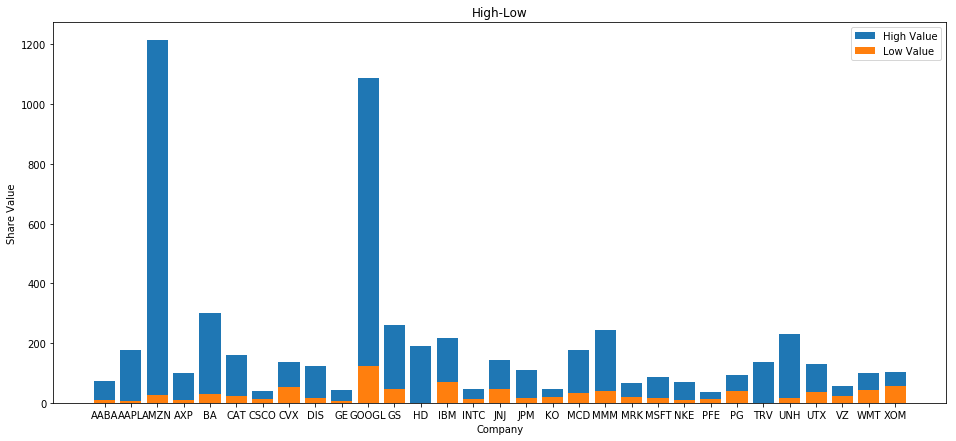

In [21]:
shares_high_low = shares.groupby('Name').agg({'High':'max','Low':'min'}).reset_index()
fig, axes =  plt.subplots(figsize=(16,7))
axes.bar(shares_high_low['Name'], shares_high_low['High'], label = 'High Value')
axes.bar(shares_high_low['Name'], shares_high_low['Low'], label = 'Low Value')
axes.set_xlabel('Company')
axes.set_ylabel('Share Value')
axes.set_title('High-Low')
axes.legend()

#### Amazon and Google has highest share values

#### Visualizing variation in share prices for each company through violin plot

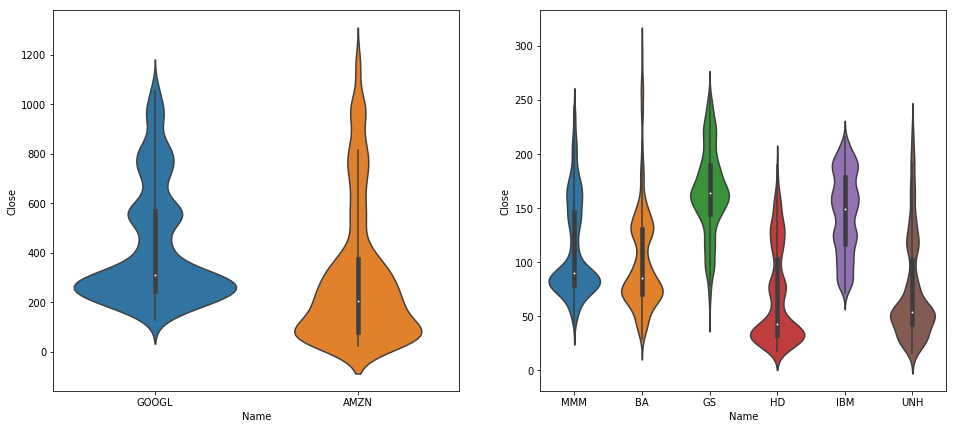

In [62]:
top_companies = shares[shares['Name'].isin(['AMZN','GOOGL'])]
mid_companies = shares[shares['Name'].isin(['BA','GS','HD','IBM','MMM','UNH'])]
fig=plt.figure(figsize=(16,7))
axes = fig.add_subplot(121)
sns.violinplot(x='Name',y='Close',data=top_companies)
axes = fig.add_subplot(122)
sns.violinplot(x='Name',y='Close',data=mid_companies)

In [23]:
# convering date column to pandas datetime type and extracting only 2017 data
shares['Date'] = pd.to_datetime(shares['Date'])
shares.index = shares['Date']
shares_2017 = shares.loc['2017']
shares_2017_GOOGL = shares_2017[shares_2017['Name'] == 'GOOGL']
shares_2017_AMZN = shares_2017[shares_2017['Name'] == 'AMZN']
shares_2017_IBM = shares_2017[shares_2017['Name'] == 'IBM']
shares_2017_GS = shares_2017[shares_2017['Name'] == 'GS']
shares_2017_MMM = shares_2017[shares_2017['Name'] == 'MMM']

In [24]:
shares_2017_AMZN.tail()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2017-12-22,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
2017-12-28,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
2017-12-29,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN


(736330.0, 736664.0)

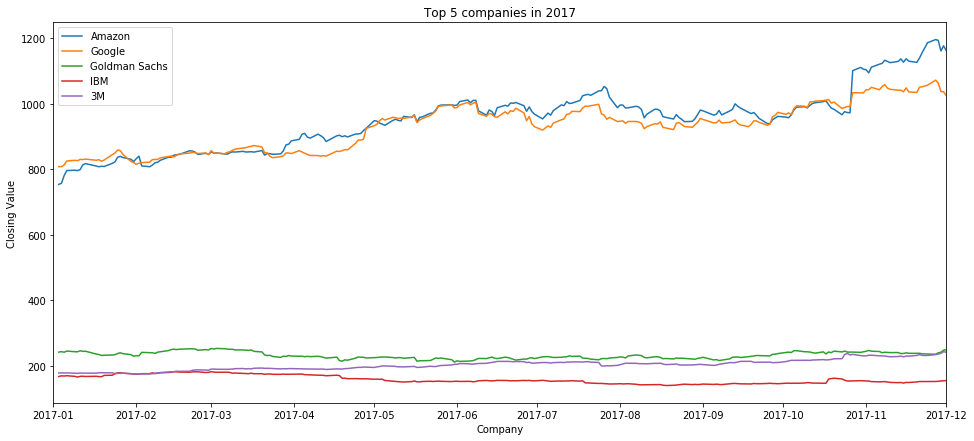

In [66]:
fig=plt.figure(figsize=(16,7))
plt.plot('Close', data=shares_2017_AMZN, label='Amazon')
plt.plot('Close', data=shares_2017_GOOGL, label='Google')
plt.plot('Close', data=shares_2017_GS, label='Goldman Sachs')
plt.plot('Close', data=shares_2017_IBM, label='IBM')
plt.plot('Close', data=shares_2017_MMM, label='3M')
plt.xlabel('Company')
plt.ylabel('Closing Value')
plt.title('Top 5 companies in 2017')
plt.legend()
plt.xlim('2017-01','2017-12')

(736330.0, 736664.0)

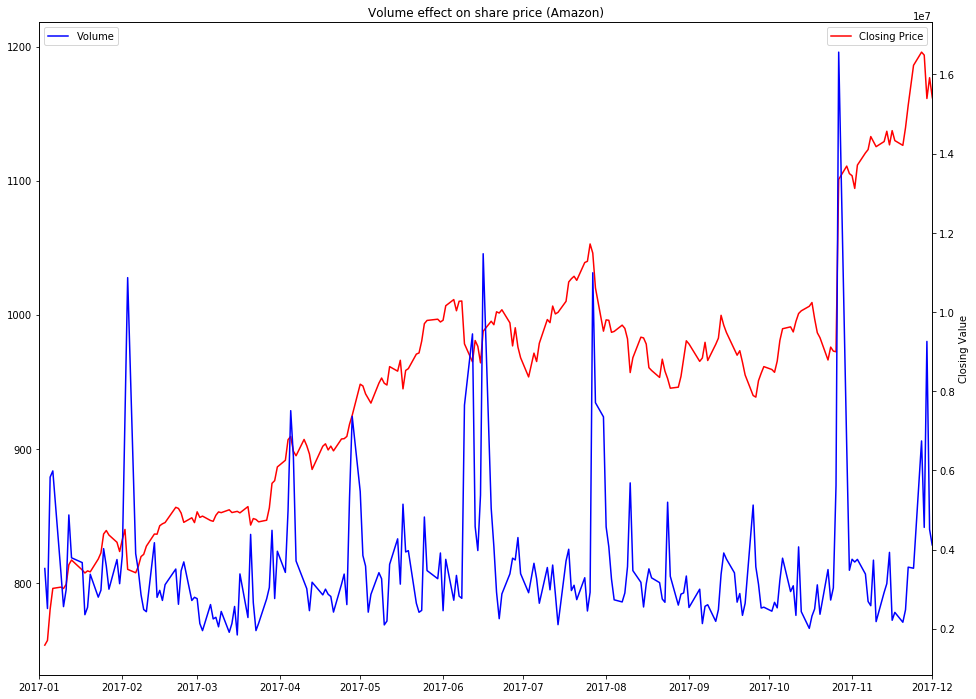

In [67]:
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111)
ax.plot('Close', data=shares_2017_AMZN, label='Closing Price', color='red' )
ax1=ax.twinx()
ax1.plot('Volume', data=shares_2017_AMZN, label='Volume', color='blue')
ax.legend(loc=0)
ax1.legend(loc=2)
plt.ylabel('Closing Value')
plt.title('Volume effect on share price (Amazon)')
plt.xlim('2017-01','2017-12')

#### Sudden increase in volume causes high changes in share prices

C:\Users\Ajinkya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



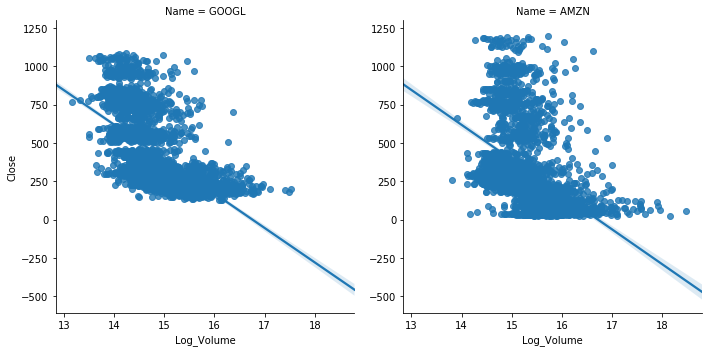

In [69]:
top_companies['Log_Volume'] = np.log(top_companies['Volume'])
sns.lmplot(x='Log_Volume',y='Close',col='Name',data=top_companies)

(736330.0, 736664.0)

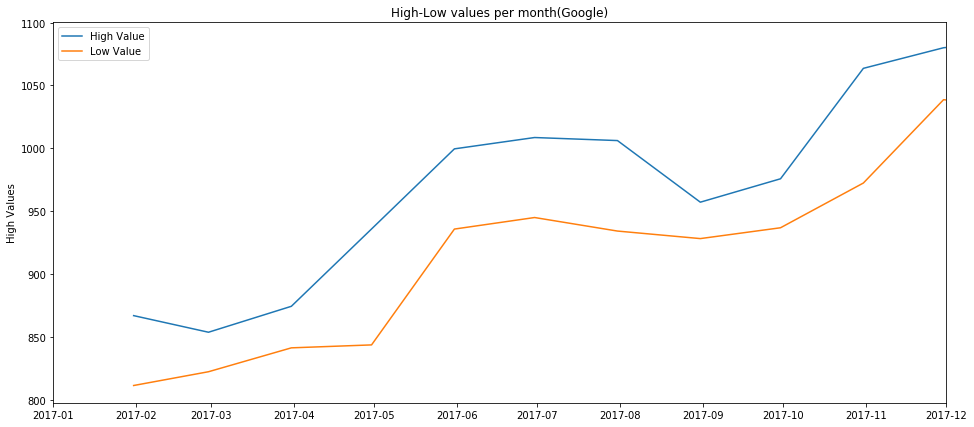

In [70]:
googl_month_high = shares_2017_GOOGL['High'].resample('M').max()
googl_month_low = shares_2017_GOOGL['High'].resample('M').min()
fig, axes =  plt.subplots(figsize=(16,7))
axes.plot(googl_month_high, label = 'High Value')
axes.plot(googl_month_low, label = 'Low Value')
axes.set_ylabel('High Values')
axes.set_title('High-Low values per month(Google)')
axes.legend()
plt.xlim('2017-01','2017-12')

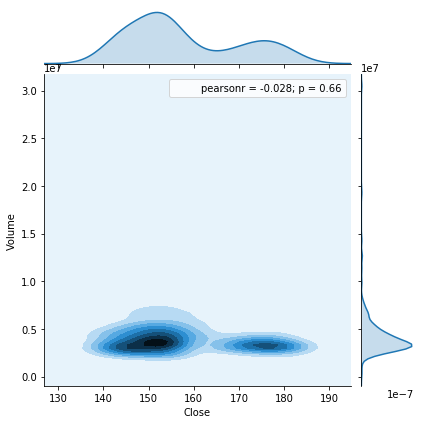

In [30]:
sns.jointplot(x='Close',y='Volume',data=shares_2017_IBM,kind='kde')

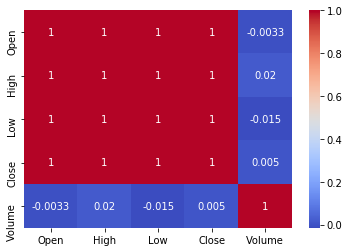

In [34]:
sns.heatmap(shares_2017_MMM.corr(),cmap='coolwarm',annot=True)

### as expected Open, High, Low and Close values are exactly correlated

([<matplotlib.patches.Wedge at 0x1404e413780>,
 [Text(-0.0890855,1.09639,'AABA'),
  Text(-0.458897,0.999707,'AAPL'),
  Text(-0.735352,0.818082,'AMZN'),
  Text(-0.800743,0.754196,'AXP'),
  Text(-0.861471,0.684008,'BA'),
  Text(-0.913216,0.613219,'CAT'),
  Text(-1.02922,0.388204,'CSCO'),
  Text(-1.09262,0.127178,'CVX'),
  Text(-1.09991,-0.0141207,'DIS'),
  Text(-1.01452,-0.425141,'GE'),
  Text(-0.820725,-0.732401,'GOOGL'),
  Text(-0.777325,-0.77831,'GS'),
  Text(-0.713074,-0.837571,'HD'),
  Text(-0.642217,-0.893061,'IBM'),
  Text(-0.391509,-1.02797,'INTC'),
  Text(-0.0861298,-1.09662,'JNJ'),
  Text(0.167881,-1.08711,'JPM'),
  Text(0.459568,-0.999398,'KO'),
  Text(0.604709,-0.918873,'MCD'),
  Text(0.654041,-0.884438,'MMM'),
  Text(0.773258,-0.78235,'MRK'),
  Text(0.999343,-0.459688,'MSFT'),
  Text(1.09311,-0.122927,'NKE'),
  Text(1.07294,0.242496,'PFE'),
  Text(0.929199,0.588718,'PG'),
  Text(0.860754,0.68491,'TRV'),
  Text(0.825381,0.727149,'UNH'),
  Text(0.778009,0.777626,'UTX'),
  Text

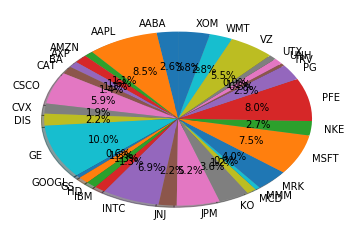

In [45]:
Jan_Volume = shares_2017.loc['01-2017'].groupby('Name').agg({'Volume':'sum'}).reset_index()
fig, ax = plt.subplots()
ax.pie(Jan_Volume['Volume'], labels=Jan_Volume['Name'], autopct='%1.1f%%',
        shadow=True, startangle=90)

In [73]:
shares_2017_bubble = shares_2017.groupby('Name').agg({'High':'max','Low':'min','Volume':'sum'}).reset_index()
shares_2017_bubble.iplot(kind='bubble',x='High',y='Low',size='Volume')